# IMPORTS

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import urllib
from urllib.request import Request, urlopen
import json
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from bs4 import BeautifulSoup
from PIL import Image

# LOADING

In [3]:
datapath = 'data/liar_dataset/'
columns = ['ID', 
           'Label', 
           'Statement', 
           'Subject', 
           'Speaker', 
           'Job title', 
           'Home State', 
           'Party Affiliations', 
           'Barely True Counts', 
           'False Counts', 
           'Half True Counts', 
           'Mostly True Counts', 
           'Pants on Fire Counts', 
           'Context']
liar_train = pd.read_csv(datapath + 'train.tsv',delimiter='\t',encoding='utf-8', names = columns)
liar_test = pd.read_csv(datapath + 'test.tsv',delimiter='\t',encoding='utf-8', names = columns)
liar_valid = pd.read_csv(datapath + 'valid.tsv',delimiter='\t',encoding='utf-8', names = columns)
liar_df = pd.concat([liar_train, liar_test, liar_valid])
liar_df.head(2)

,ID,Label,Statement,Subject,Speaker,Job title,Home State,Party Affiliations,Barely True Counts,False Counts,Half True Counts,Mostly True Counts,Pants on Fire Counts,Context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.


# EXTRACT LIARS AND GET SINGLE SPEAKER

In [4]:
lie = liar_df[(liar_df['Label'] == 'half-true') | (liar_df['Label'] == 'false') | (liar_df['Label'] == 'pants-fire')]
test = lie.groupby('Speaker')['Statement'].apply(lambda x: "{%s}" % '// '.join(x))
test = pd.DataFrame(test)
test.columns = ['Quotes']
test = test.reset_index()
test["Quotes"] = test["Quotes"].astype('str')
type(test.Quotes)

pandas.core.series.Series

In [7]:
Trump = test[(test['Speaker'] == 'donald-trump')]
Trump.to_csv('Trump.csv')
Trump.to_csv('Trump.txt')
Trump_array = np.array(Trump.Quotes)
Trump

,Speaker,Quotes
545,donald-trump,{Says the man who rushed the stage at him in D...


# WORD MAP

In [8]:
#text = open('res/test_plain_text.txt').read() #President Donald Trump's statement to the United Nations General Assembly on Sept. 25, 2018.
text = str(Trump_array)
trump_mask = np.array(Image.open('res/Trumpy3.png'))
wc = WordCloud(background_color="white", max_words=2000, mask=trump_mask,contour_width=0, contour_color='steelblue')
# generate word cloud
wc.generate(text)

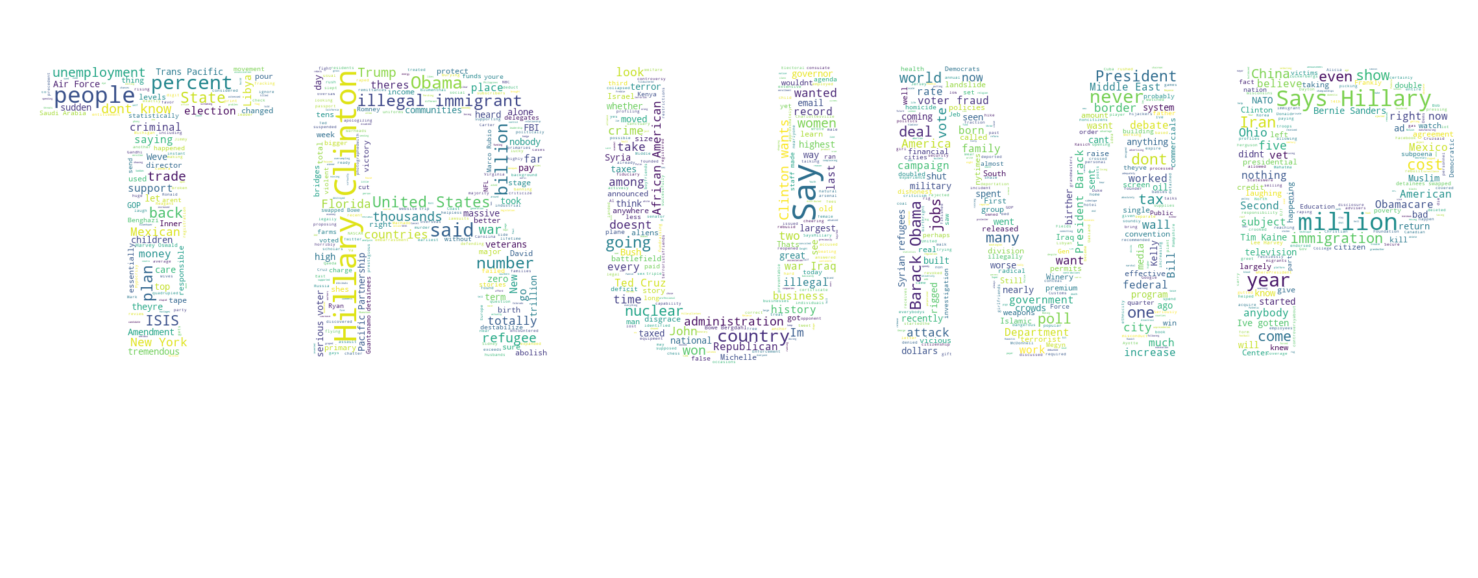

In [9]:
# show the word cloud
plt.figure(figsize = (30,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

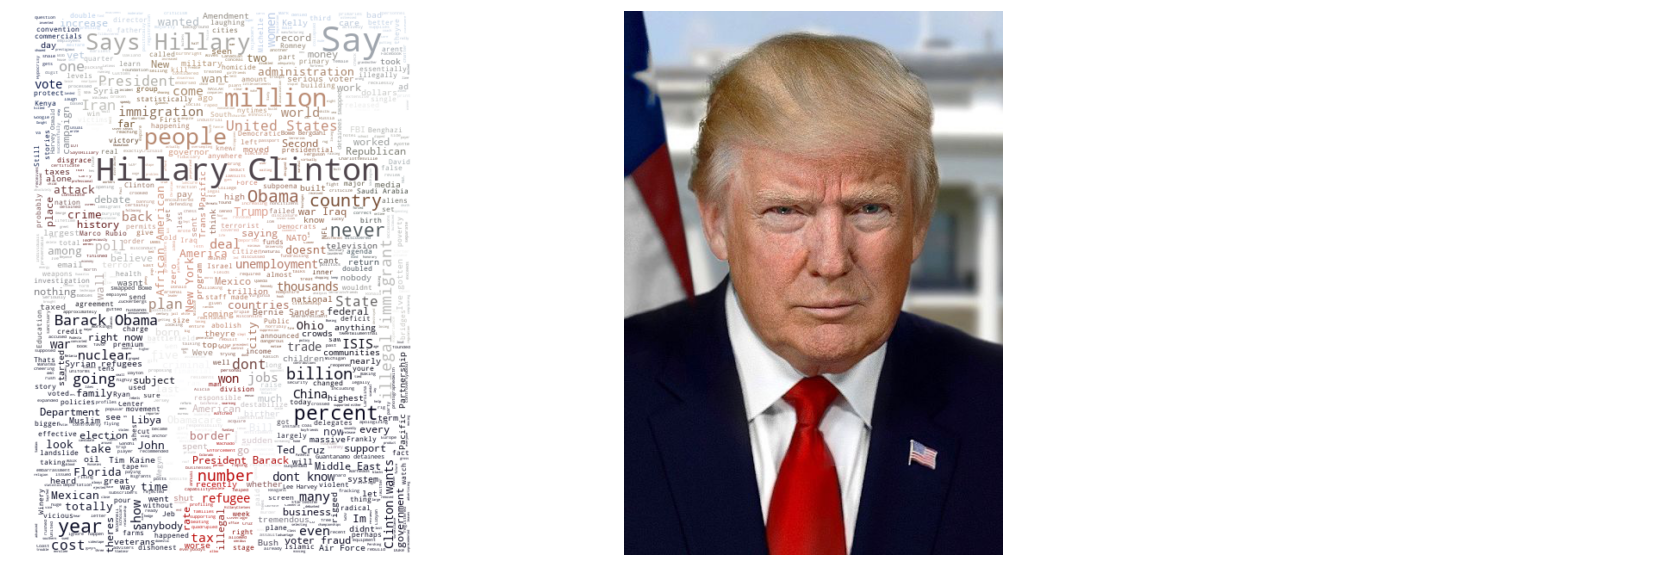

In [29]:
# Read the whole text.
#text = open('res/test_plain_text.txt').read()
text = str(Trump_array)
# read the mask / color image taken from
# http://jirkavinse.deviantart.com/art/quot-Real-Life-quot-Alice-282261010
alice_coloring = np.array(Image.open('res/DT2.png'))
stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(background_color="white", max_words=2000, mask=alice_coloring,
               stopwords=stopwords, max_font_size=40, random_state=42)
# generate word cloud
wc.generate(text)

# create coloring from image
image_colors = ImageColorGenerator(alice_coloring)

# show
fig, axes = plt.subplots(1, 3,figsize = (30,10))
# recolor wordcloud and show
# we could also give color_func=image_colors directly in the constructor
axes[0].imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
axes[1].imshow(alice_coloring, cmap=plt.cm.gray, interpolation="bilinear")
for ax in axes:
    ax.set_axis_off()
plt.show()

# SENTIMENT ANALYSIS